# 04.01 - Simple Linear Regression

## Naive / Baseline Prediction

The naive or baseline prediction is the simplest prediction we can make using only a single value. This value is often the mean or median of the target variable. Though this method is rather simplistic and doesn't consider other variables, it provides a baseline against which more complex models can be evaluated. For example, in simple linear regression, a naive prediction might be the mean value of the dependent variable, assuming no relationship with the independent variable. This gives us a starting point to compare the performance of our regression model and assess its predictive power.

Let’s generate some data.

In [1]:
# Import the required library
import numpy as np

# Set a seed for the random number generator for reproducibility
np.random.seed(42)

# Create an array 'x' with 100 equally spaced numbers between -5 and 50
# The linspace function generates 'n' evenly spaced intervals between the start and the end value
x = np.linspace(-5, 50, 100)

# Create the 'y' variable which is a linear function of 'x' plus some normally distributed random noise
# The slope of the line is 2 and the y-intercept is 50
# The np.random.normal function generates random numbers from a normal distribution with mean 0 and standard deviation 20
# The size parameter is set to be the same as the length of 'x' so that we have a 'y' value for each 'x' value
y = 50 + 2 * x  + np.random.normal(0, 20, size=len(x))

In [2]:
# Import the pandas library which provides data structures and data analysis tools
import pandas as pd

# Create a new pandas DataFrame 'df' from a dictionary
# The dictionary has two keys: 'X' and 'Y'
# Each key is associated with a list of values, which are the 'x' and 'y' arrays we created earlier
# In the DataFrame, each key will become a column name and the associated list of values will become the column's values
df = pd.DataFrame({'X': x, 'Y': y})

# The head() function returns the first 5 rows of the DataFrame for a quick preview
# This is useful to quickly check if the DataFrame has been created successfully and to view a small sample of the data
df.head()

,X,Y
0,-5.000000,49.934283
1,-4.444444,38.345825
2,-3.888889,55.175993
3,-3.333333,73.793930
4,-2.777778,39.761377


Even with limited knowledge about our data, we can still make a basic prediction using the mean value. This is often referred to as a naive or baseline prediction. Despite its simplicity, this method serves as a useful starting point for comparison as we develop more complex predictive models. It's important to note that while this approach doesn't take into account any potential relationships between variables, it provides a benchmark against which the effectiveness of more sophisticated models can be evaluated.

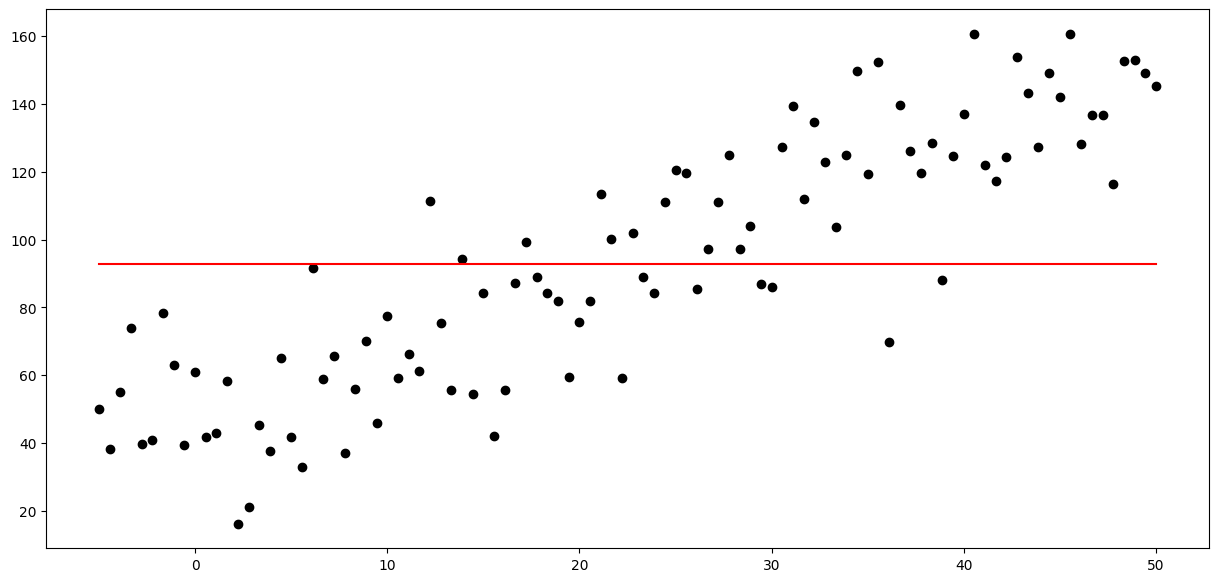

In [3]:
# Import the matplotlib library for data visualization
import matplotlib.pyplot as plt

### Plot the data
# First, we create a new figure with a defined size (15 units wide, 7 units tall)
fig = plt.figure(figsize=(15,7))

# Next, we get the current axis, on which we will plot our data
ax = plt.gca()

# With the scatter function, we plot our 'x' and 'y' arrays as a scatter plot
# The 'c' parameter determines the color of the data points. Here, 'k' stands for black
ax.scatter(x, y, c='k')

# We also want to plot a line that represents our naive prediction. The line should run from the minimum to the maximum x-value
# The y-value for this line is the mean of the 'y' array. This is done using the plot function.
# The first parameter of the plot function is a tuple representing the x-values of the start and end point of the line
# The second parameter is a tuple representing the y-values of the start and end point of the line
# The color of the line is set to red ('r')
ax.plot((df['X'].min(), df['X'].max()), (np.mean(df['Y']), np.mean(df['Y'])), color='r')

We will now include this naive prediction into our DataFrame for future reference and use. This involves creating a new column in our DataFrame, which we can call 'Mean_Yhat'. Every entry in this column will be the mean of the 'Y' column, representing our baseline prediction for the dependent variable, irrespective of the 'X' value. This added data will be useful for comparison when we develop and evaluate more sophisticated predictive models.

In [4]:
# We want to add a new column to our DataFrame 'df' to store the mean prediction
# The mean prediction is the mean of the 'Y' column, which we calculated earlier
# To do this, we use the 'mean' function on the 'Y' column of 'df'
# This calculates the mean of all the values in the 'Y' column
# We then assign this mean value to a new column in 'df' called 'Mean_Yhat'
# As a result, every row in the 'Mean_Yhat' column will have the same value: the mean of the 'Y' column
df['Mean_Yhat'] = df['Y'].mean()

# After adding the new column, we can use the 'head' function to quickly check the first few rows of our DataFrame
# This helps us ensure that the new column has been added correctly
# The 'head' function by default returns the first 5 rows, but you can pass any number as an argument to return that many rows
# For example, 'df.head(10)' would return the first 10 rows
df.head()

,X,Y,Mean_Yhat
0,-5.000000,49.934283,92.92307
1,-4.444444,38.345825,92.92307
2,-3.888889,55.175993,92.92307
3,-3.333333,73.793930,92.92307
4,-2.777778,39.761377,92.92307


## Finding the "Best" Slope and Intercept

The goal of regression analysis is to find the "best" values for the slope and intercept, which define the line that best fits the data. To determine what the "best" values are, we need a criterion that can be optimised (either maximised or minimised).

### Residuals

A key concept in regression analysis is the residual, which is the difference between the actual value of the dependent variable ($Y$) and the value predicted by the regression model ($\hat{Y}$). We denote each residual as $ε_i$.

This residual, or error, is calculated for each observation i from 1 to n, where:

- $X_i$ is the observed value of the independent variable,
- $Y_i$ is the observed value of the dependent variable,
- $\hat{Y}_i$ is the predicted value of $Y$ based on the regression model, which is a function (f) of $X_i$,
- $ε_i$ is the residual, which is the difference between the observed and predicted values of $Y$.

### Residual Sum of Squares ($RSS$)

The most common criterion for finding the "best" line is to minimize the sum of the squared residuals, known as the Residual Sum of Squares (RSS). This is the sum of the squared differences between the actual and predicted values of $Y$ for all observations in the data set. Mathematically, it is expressed as:

### $$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

The RSS is a type of loss function, where the "loss" is the sum of squared residuals.

### Parameters vs. Statistics

A parameter is a value that describes a characteristic of the population, while a statistic is a value that describes a characteristic of a sample from the population. In the context of regression analysis, the parameters are the actual slope ($β1$) and intercept ($β0$) of the line that describes the relationship between $X$ and $Y$ in the population.

The statistics are the estimated slope ($\hat{β1}$) and intercept ($\hat{β0}$) that we calculate from the sample data. These estimates are used to make predictions ($\hat{Y}$) about the dependent variable ($Y$).

So, the equation with parameters:

### $$ Y = β_0 + β_1 X $$

expresses the actual relationship in the population, while the equation with statistics:

### $$ \hat{Y} = \hat{β}_0 + \hat{β}_1 X $$

is the model we use to make predictions based on the sample data.

Remember our naive prediction? Let's see how it does.

In [5]:
# Calculate Sum of Squared Errors (SSE)
# The SSE is a measure of the discrepancy between the data and an estimation model
# It quantifies the variance in the data set that is not explained by the prediction model

# 'df['Y']' accesses the 'Y' column of the DataFrame 'df'
# 'df['Mean_Yhat']' accesses the 'Mean_Yhat' column of the DataFrame 'df'
# Subtraction: 'df['Y'] - df['Mean_Yhat']' calculates the prediction error for each data point
# Prediction error is the difference between the actual value and the predicted value
# The result is an array of errors, one for each data point

# np.square() squares each element in the array
# Squaring the prediction errors has the effect of penalizing larger errors

# np.sum() calculates the sum of all elements in the array
# This is the Sum of Squared Errors (SSE), which we want to minimize in regression analysis
np.sum(np.square(df['Y'] - df['Mean_Yhat']))  # type: float

140690.96186554074

In [6]:
# Calculate Mean Squared Error (MSE)
# The MSE is another measure of the accuracy of a predictive model
# It is similar to the Sum of Squared Errors (SSE), but instead of adding up all the squared errors, it calculates their average
# This gives us an idea of the "typical" error made by our predictions, with larger errors being penalized more due to the squaring

# 'df['Y']' accesses the 'Y' column of the DataFrame 'df'
# 'df['Mean_Yhat']' accesses the 'Mean_Yhat' column of the DataFrame 'df'
# Subtraction: 'df['Y'] - df['Mean_Yhat']' calculates the prediction error for each data point
# Prediction error is the difference between the actual value and the predicted value
# The result is an array of errors, one for each data point

# np.square() squares each element in the array
# Squaring the prediction errors has the effect of penalizing larger errors

# np.mean() calculates the average of all elements in the array
# This is the Mean Squared Error (MSE), which we also want to minimize in regression analysis
np.mean(np.square(df['Y'] - df['Mean_Yhat']))  # type: float

1406.9096186554075

In [7]:
# Calculate Root Mean Squared Error (RMSE)
# The RMSE is a measure of the differences between the actual values and the predicted values
# It is similar to the Mean Squared Error (MSE), but it takes the square root of the MSE
# This has the effect of bringing the error metric back into the same units as the original data, which can be useful for interpretation
# For example, if our data is in units of dollars, the MSE would be in dollars squared, but the RMSE would be in dollars

# 'df['Y']' accesses the 'Y' column of the DataFrame 'df'
# 'df['Mean_Yhat']' accesses the 'Mean_Yhat' column of the DataFrame 'df'
# Subtraction: 'df['Y'] - df['Mean_Yhat']' calculates the prediction error for each data point
# Prediction error is the difference between the actual value and the predicted value
# The result is an array of errors, one for each data point

# np.square() squares each element in the array
# Squaring the prediction errors has the effect of penalizing larger errors

# np.mean() calculates the average of all elements in the array
# This gives us the Mean Squared Error (MSE)

# The '** 0.5' operation takes the square root of the MSE to calculate the Root Mean Squared Error (RMSE)
(np.mean(np.square(df['Y'] - df['Mean_Yhat']))) ** 0.5  # type: float

37.50879388430675

### Minimizing the Mean Squared Error (MSE)

In the context of simple linear regression, we can derive the intercept and slope that minimizes the Residual Sum of Squares ($RSS$) algebraically. This optimization is directly related to minimizing the Mean Squared Error ($MSE$) of the regression line, as the $MSE$ is simply the $RSS$ divided by the number of data points.

Given certain variables, such as:

- $\bar{y}$: the sample mean of observed values $Y$
- $\bar{x}$: the sample mean of observed values $X$
- $s_Y$: the sample standard deviation of observed values $Y$
- $s_X$: the sample standard deviation of observed values $X$
- $r_{XY}$: the sample Pearson correlation coefficient between observed $X$ and $Y$

We can derive the equations for the intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) that minimize the RSS:

### $$ \hat{β}_0 = \bar{y} - \hat{β}_1\bar{x} $$

### $$ \hat{β}_1 = r_{XY} * \frac{s_Y}{s_X}$$

In this context, our simple linear regression is essentially an estimator of the expected value (or mean) of $Y$ given our input $X$.

It's important to note that an estimator refers to a mathematical function or formula that provides an estimate. For example, an estimator might be the sample mean, and the estimate is the specific value of the sample mean derived from our dataset.

Let’s calculate beta coefficients manually.

In [8]:
# Calculate the mean of 'Y' and 'X'
y_bar = df['Y'].mean()  # type: float
x_bar = df['X'].mean()  # type: float

# Calculate the standard deviation of 'Y' and 'X'
# 'ddof = 1' indicates that the standard deviation is calculated with n-1 in the denominator, which is an unbiased estimator of the population standard deviation
std_y = np.std(df['Y'], ddof = 1)  # type: float
std_x = np.std(df['X'], ddof = 1)  # type: float

# Calculate the Pearson correlation coefficient between 'X' and 'Y'
r_xy = df.corr().loc['X','Y']  # type: float

# Calculate the slope (beta_1) and the intercept (beta_0) for the linear regression equation
beta_1 = r_xy * (std_y / std_x)  # type: float
beta_0 = y_bar - beta_1 * x_bar  # type: float

# Create a new column 'Linear_Yhat' which stores predicted values of 'Y' based on the linear regression equation
df['Linear_Yhat'] = beta_0 + beta_1 * df['X']  # type: pd.Series

# Calculate the mean of the squared differences between the actual and predicted values of 'Y'
# This value is known as the Mean Squared Error (MSE)
np.square(df['Y'] - df['Linear_Yhat']).mean()  # type: float

325.9618853992313

The new Mean Squared Error (MSE) is significantly smaller than the old MSE, which indicates that our new model fits the data more accurately. The MSE is a measure of the average squared difference between the actual and predicted values, so a smaller MSE means that our model's predictions are closer to the actual values. In other words, the residuals (the differences between actual and predicted values) are smaller on average. This improvement suggests that our new regression model is more effective in predicting the dependent variable based on the independent variable.

We can now plot our line.

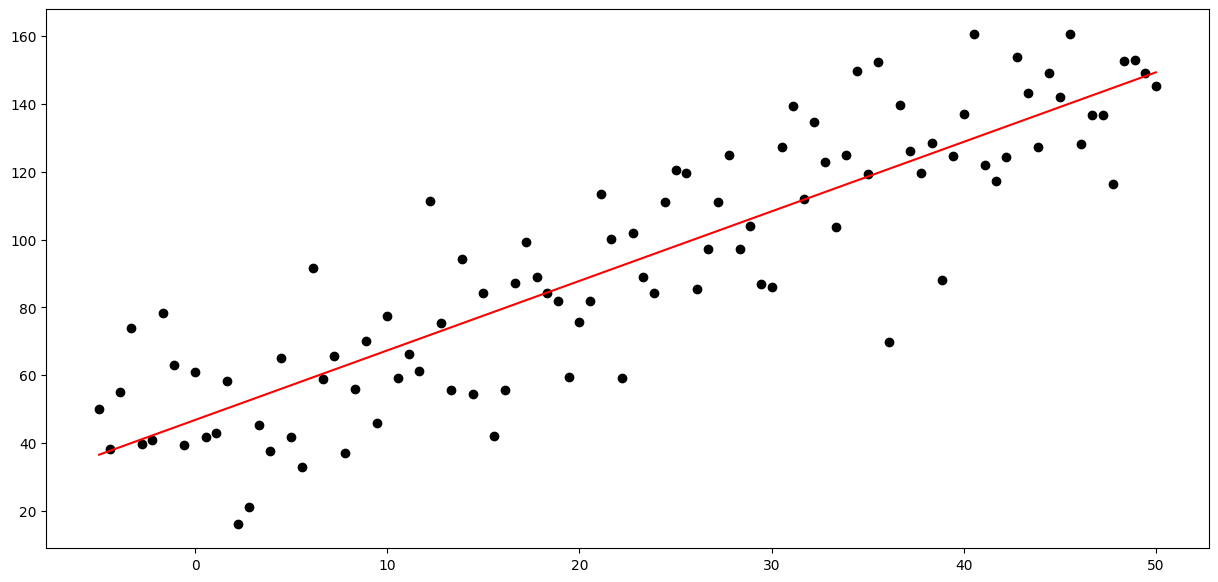

In [9]:
# First, we create a figure object using the plt.figure() function from matplotlib.pyplot
# The figsize argument sets the figure size in inches (width, height)
fig = plt.figure(figsize=(15,7))  # type: plt.Figure

# Using the gca() function, we get the current Axes instance on the current figure
# "gca" stands for "get current axis"
ax = plt.gca()  # type: plt.Axes

# We then create a scatter plot using the scatter() function
# 'x' and 'y' are the data positions (horizontal and vertical coordinates), 'c=k' sets the color of the markers to black
ax.scatter(x, y, c='k')  # type: plt.Collection

# The plot() function is used to draw a line from one point to another
# 'df['X']' is the x-coordinates, 'df['Linear_Yhat']' is the y-coordinates, and 'color='r'' sets the color of the line to red
ax.plot(df['X'], df['Linear_Yhat'], color='r')  # type: List[plt.Line2D]

We can also plot our residuals.

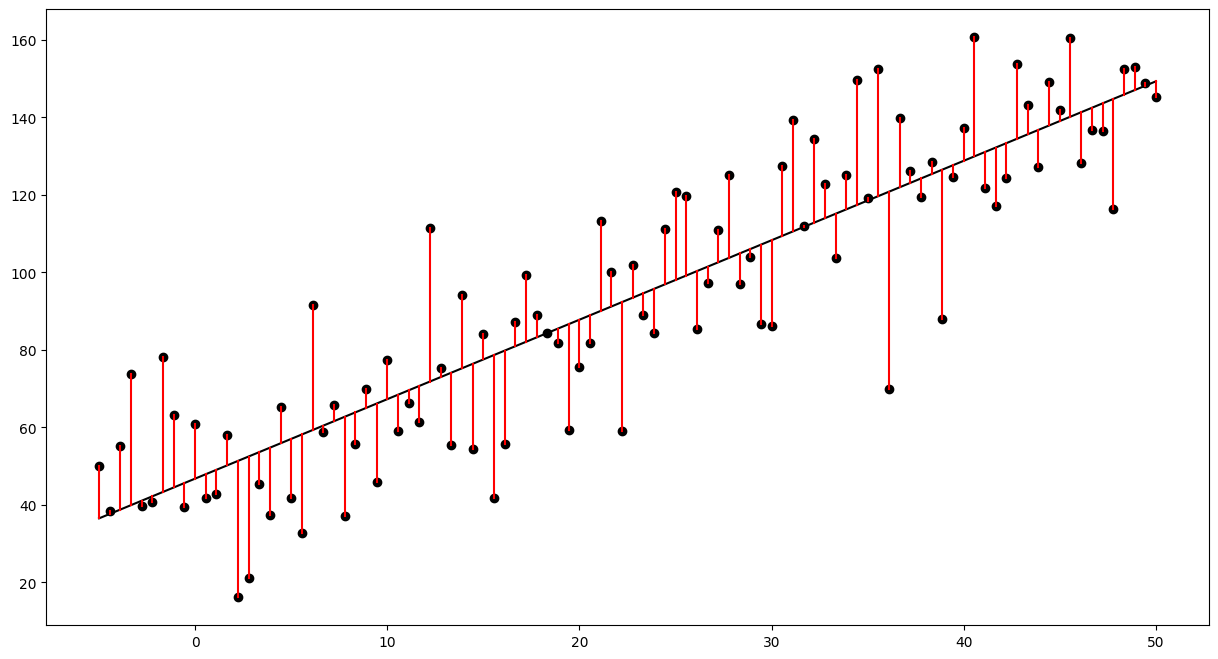

In [10]:
# Create a figure using matplotlib's pyplot (plt) library
# Set the figure size to be 15 units wide and 7 units tall
fig = plt.figure(figsize=(15,7))

# Set the height of the figure to 8 units
fig.set_figheight(8)

# Set the width of the figure to 15 units
fig.set_figwidth(15)

# Get the current Axes instance on the current figure
# "gca" stands for "Get Current Axis"
ax = fig.gca()

# Create a scatter plot on these axes
# The x-coordinates are the 'X' values from the dataframe (df)
# The y-coordinates are the 'Y' values from the dataframe (df)
# The color of the points is set to black ('k')
ax.scatter(x=df['X'], y=df['Y'], c='k')

# Create a line plot on these axes
# The x-coordinates are the 'X' values from the dataframe (df)
# The y-coordinates are the 'Linear_Yhat' values from the dataframe (df)
# This line represents our linear regression model
# The color of the line is set to black ('k')
ax.plot(df['X'], df['Linear_Yhat'], color='k')

# Iterate over the rows in the dataframe (df)
# For each row, draw a line from the actual y-value to the predicted y-value
# This line is vertical and represents the residual (error) for this data point
# The x-coordinates for this line are both the 'X' value for this row (so the line is vertical)
# The y-coordinates for this line are the actual 'Y' value and the predicted 'Linear_Yhat' value
# The color of this line is set to red ('r')
for _, row in df.iterrows():
    plt.plot((row['X'], row['X']), (row['Y'], row['Linear_Yhat']), 'r-')

## Interpretation of Simple Linear Regression

Suppose we have a hypothesis that commute time, denoted as $Y$, can be modeled as a linear function of the number of Metro stops. Then, our model is:

### $$ [commute] = \beta_0 + \beta_1 [Metro\_stops] $$

We aim to estimate this model from our data. We collect data over a significant period and organize it into a Pandas dataframe with a column for commute time and another for the number of Metro stops. Then, our estimate of the actual model is:

### $$ \hat{[commute]} = \hat{\beta}_0 + \hat{\beta}_1 [Metro\_stops] $$

Assuming that $\hat{\beta}_0$ is 5 and $\hat{\beta}_1$ is 3:

- $\hat{\beta}_1$ interpretation: "As the number of Metro stops increases by 1, I expect commute time to increase by three minutes."
- $\hat{\beta}_0$ interpretation: "If someone travels zero stops on the Metro, I expect commute time to be five minutes."

The simple linear regression estimators mentioned above have several beneficial properties:

1. They are unbiased. On average, the statistics will equal the actual parameter value.
2. Among all unbiased estimators, these estimators above have the lowest possible variance.
3. They are consistent. As the sample size n approaches infinity, the statistic converges to the true parameter value.

However, these are purely mathematical properties and do not account for real-world situations. For instance, let's consider a SLR model to predict commute time:

```
[commute time] = 8 * [number of Metro stops] - 10

```

In this model, if I commute zero or one stop on the Metro, my commute time is estimated to be negative, which doesn't make sense in real life!

**What this means:**

When building a model, ensure that your model is logical. You are responsible for the interpretation of the model. The computer's role is merely to optimize. While you may not make a mistake fitting a model (and won't get an error!), remember that the framework has limitations.

## Assumptions of Simple Linear Regression

SLR involves some critical assumptions:

1. **Linearity:** Y and X must have an approximately linear relationship.
2. **Independence:** Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \neq j$.
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.
4. **Equality of Variances** (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)

The mnemonic **LINE** is an easy way to remember these four assumptions.

More detailed discussions of the four main assumptions and how to evaluate or test for each of these can be found at various sources.

If all four assumptions are true, the following holds:

### $$ Y_i \sim N(\beta_0 + \beta_1 X_i, \sigma) $$

## Challenge

Your task is to create a `SimpleLinearRegression` class in Python that has the following methods:

- `__init__(self, x, y)`: A constructor that takes two lists of numbers of equal length as parameters `x` and `y`. These represent the x-coordinates and y-coordinates of a set of points, respectively.
- `calculate_slope(self)`: This method should calculate and return the slope of the line of best fit for the given points.
- `calculate_intercept(self)`: This method should calculate and return the y-intercept of the line of best fit for the given points.
- `predict(self, x_values)`: This method should take in a list of x-values and return a list of predicted y-values using the line of best fit.

### Output Format

- The `calculate_slope` method must return the slope of the line of best fit, rounded to 2 decimal places.
- The `calculate_intercept` method must return the y-intercept of the line of best fit, rounded to 2 decimal places.
- The `predict` method must return a list of predicted y-values, each rounded to 2 decimal places.

### Explanation

Consider the following code:

```python
# Create a SimpleLinearRegression object with x-coordinates [1, 2, 3] and y-coordinates [2, 3, 5]
regression = SimpleLinearRegression([1, 2, 3], [2, 3, 5])

# Print the slope
print(regression.calculate_slope())

# Print the y-intercept
print(regression.calculate_intercept())

# Print the predicted y-values for x-coordinates [4, 5, 6]
print(regression.predict([4, 5, 6]))

```

When executed with a properly implemented `SimpleLinearRegression` class, this code should print:

```
1.5
0.67
[6.67, 8.17, 9.67]

```

In [ ]:
### WRITE YOUR CODE BELOW THIS LINE ###


### WRITE YOUR CODE ABOVE THIS LINE ###